In [228]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [206]:
#Считываем csv - файл
file_path = r'./simplified_coffee.csv'
df = df = pd.DataFrame()
df = df = pd.read_csv(file_path)

In [208]:
# Выводим название всех колонок
df.columns

Index(['name', 'roaster', 'roast', 'loc_country', 'origin_1', '100g_USD',
       'rating', 'review_date', 'desc_1'],
      dtype='object')

# Колонки

***name*** - Название смеси

***roaster*** - Имя обжарщика

***roast*** - Тип обжарки

***loc_country*** - Расположение жаровни

***origin_1*** - Тип обжарки

***100g_USD*** - цена за 100 г в долларах США

***rating*** - Рейтинг

***review_date*** - Дата отзыва

***desc_1*** - текст отзыва


In [209]:
# Оставляем только те колонки которые нам понадобятся
df = df[['name', 'roaster', 'roast', 'loc_country', 'origin_1', '100g_USD', 'rating']]

In [164]:
# При анализе dataframe(df) выясняется, что он содержит некоректные данные
df.sample(5)

,name,roaster,roast,loc_country,origin_1,100g_USD,rating
640,United States,United States,United States,United States,United States,United States,United States
722,Ethiopia Suke Quto Single-Origin Espresso,Temple Coffee Roasters,Medium-Light,United States,Ethiopia,5.58,94
211,Kenya Rugeto Peaberry,Temple Coffee and Tea,Medium,United States,Kenya,5.88,93
304,Kenya Handege,Greater Goods Coffee Roasters,Medium,United States,Kenya,5.58,94
777,Colombia Caldas Finca Villa Clara Supremo,CofFeeling,Medium-Light,Taiwan,Colombia,3.52,92


In [210]:
# Выводим информациб о df
# Убедились, что колонки с числовыми типами имеют тип который нам не подходит
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1267 non-null   object
 1   roaster      1267 non-null   object
 2   roast        1255 non-null   object
 3   loc_country  1267 non-null   object
 4   origin_1     1267 non-null   object
 5   100g_USD     1267 non-null   object
 6   rating       1267 non-null   object
dtypes: object(7)
memory usage: 34.7+ KB


In [211]:
# Убираем некоректные строки
# Конвертируем колонки в нужный тип
df = df.query("(rating != 'United States')" or "(100g_USD != 'United States')").astype({'rating':int, '100g_USD':float})

In [212]:
# Проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin_1     1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int32  
dtypes: float64(1), int32(1), object(5)
memory usage: 48.7+ KB


In [214]:
# Получаем статистическую информацию о df
df.describe()

,100g_USD,rating
count,1246.000000,1246.000000
mean,10.479125,93.306581
std,13.486674,1.479413
min,0.170000,84.000000
25%,5.260000,93.000000
50%,6.170000,93.000000
75%,9.600000,94.000000
max,132.280000,97.000000


array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

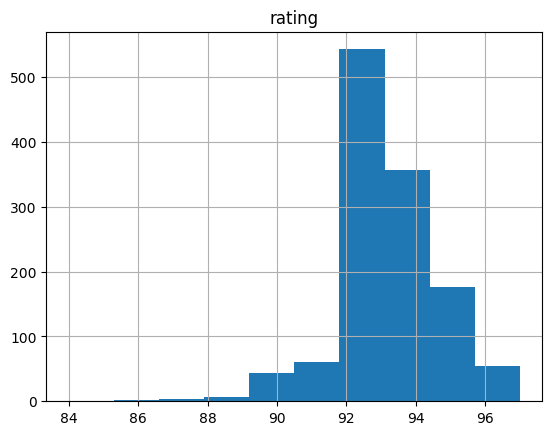

In [215]:
# Распределение величин рейтинга
df[['rating']].hist()

In [216]:
# Ищем значение рейтинга которое находится в средине
print(len(df))
df[df['rating']>93]['name'].count()

1246


588

Прежде чем приступить к классификации необходимо закодировать информацию, которая представлена текстом 

In [217]:
col=['name', 'roaster', 'roast', 'loc_country', 
     'origin_1', '100g_USD', 'rating']

X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]

In [219]:
# Так выглядят данные после кодирования.
# Теперь система сможет их распознавать
X.sample(3)

,name,roaster,roast,loc_country,origin_1,100g_USD,rating
370,351,24,0,0,5,6.17,93.0
613,572,187,0,4,0,5.58,94.0
714,665,157,0,0,11,8.35,93.0


In [221]:
# Y будет равен нулю если рейтинг 93 и меньше, и единице если больше 93
Y=df['rating'].apply(lambda x: 1 if x>93 else 0).values

In [222]:
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [223]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [225]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.2431, 'roaster'],
 [0.2359, 'name'],
 [0.1937, '100g_USD'],
 [0.1388, 'origin_1'],
 [0.0905, 'rating'],
 [0.0502, 'loc_country'],
 [0.0477, 'roast']]

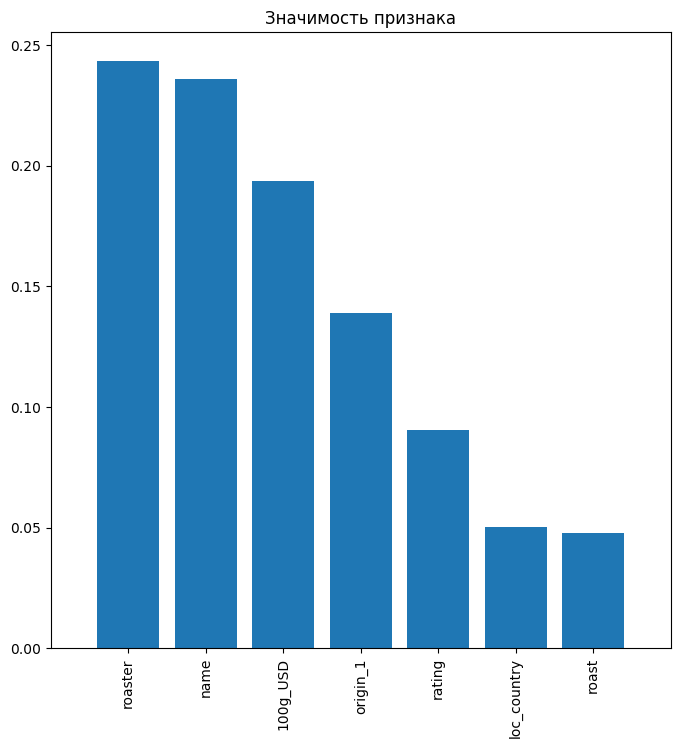

In [229]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [232]:
from sklearn import metrics
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.72


In [233]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[111,  34],
       [ 36,  69]], dtype=int64)

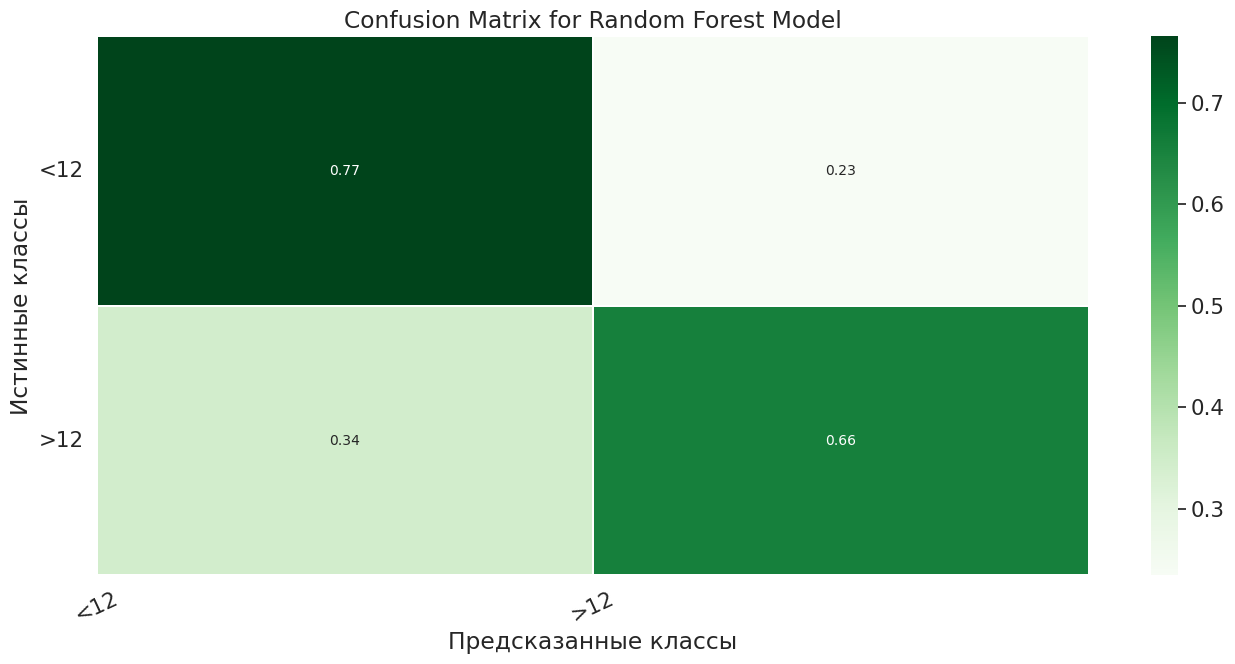

In [241]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
import seaborn as sns
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
mpl.pyplot.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=mpl.pyplot.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['<12', '>12']                 # !!!!!! указать названия классов!
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
mpl.pyplot.xticks(tick_marks, class_names, rotation=25)
mpl.pyplot.yticks(tick_marks2, class_names, rotation=0)
mpl.pyplot.xlabel('Предсказанные классы')
mpl.pyplot.ylabel('Истинные классы')
mpl.pyplot.title('Confusion Matrix for Random Forest Model')
mpl.pyplot.show()